<a href="https://colab.research.google.com/github/evalentin93/Geology_Projects_Python/blob/master/Shoshonite_Adakite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Subduction related rocks database project

This project aims to deal with a large geochemistry database involving magmatic rocks of subduction related tectonic environments. This database comprises both young and ancient rocks and the goal is to separate shoshonitic (K affinity) and adakitic (Na affinity) rocks from the regular calc-alkaline and tholeitic series rocks.

Database: https://www.earthchem.org/

### Modules

In [ ]:
!pip install git+https://github.com/evalentin93/geoplots

In [ ]:
!pip install git+https://bitbucket.org/jsteven5/tasplot.git

In [ ]:
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import geoplots
import tasplot

### Data importation and basic filtering

In [ ]:
# Transform the desired part of the Excel spreadsheet into a pandas dataframe
wb = load_workbook(filename='/content/drive/My Drive/Colab Notebooks/Prog. Geociências/Projeto/earthchem_Major_Trace.xlsx', read_only=True)

ws = wb['Data']

data_row = []
for line in ws['A7':'DN10409']:
    data_col = []
    for cell in line:
        data_col.append(cell.value)
    data_row.append(data_col)

df = pd.DataFrame(data_row)

In [ ]:
# Drop the first line of the df and substitute the column names by the header values
header = df.iloc[0]
df2 = df.drop(0)
df2.columns = header.values

In [ ]:
df2.head(6)

,SAMPLE ID,IGSN,EXPEDITION ID,REFERENCES,LATITUDE,LONGITUDE,LOC PREC,MIN ELEVATION,MAX ELEVATION,TECTONIC SETTING,MIN AGE,AGE,MAX AGE,METHOD,ANALYZED MATERIAL,ROCK TYPE,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,SRO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO2,...,BE,BI,BR,CR,CS,GA,GER,HF,I,IR,K,LI,MO,NA,NB,OS,P,PB,PD,PT,RB,RE,RH,RU,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZR,ZR2O3
1,*AQ39C-108,None,nr,"MARTY, 1997",-4,150,1,None,None,BACK-ARC_BASIN,None,None,None,MS,GLASS,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,*ATA8-9,None,nr,"JENNER, 1987",-21,-175,0.1,None,None,BACK-ARC_BASIN,None,None,None,MS-ID,WHOLE ROCK,IGNEOUS:VOLCANIC:INTERMEDIATE,ANDESITE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,*ST2-17-10,None,nr,"MARTY, 1999",-18.83,173.48,0.01,-2750,-2750,BACK-ARC_BASIN,None,None,None,MS,GLASS,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,*ST2-17-6,None,nr,"MARTY, 1999",-18.83,173.48,0.01,-2750,-2750,BACK-ARC_BASIN,None,None,None,MS,GLASS,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,*ST2-17-7,None,nr,"MARTY, 1999",-18.83,173.48,0.01,-2750,-2750,BACK-ARC_BASIN,None,None,None,MS,GLASS,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,*T7D69-12,None,nr,"FRYER, 1997",21.7,143.6,0.1,None,None,BACK-ARC_BASIN,None,None,None,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,49.99,0.72,14.99,None,9.48,None,None,None,None,None,8.07,12.23,None,1.58,2.04,0.44,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3.7,None,None,None,None,None,44,None,None,None,None,None,None,None,600,None,None,None,None,None,None,None,None,24,127,None


In [ ]:
# Check for repeated header names, if there are repeated column names, deal with them in Excel
# *I need to learn how to compare the repeated names and exclude one of them*
a = df2.columns.value_counts()

In [ ]:
# Create a copy for safety reasons:
df2_copy = df2.copy()

# Drop the rows where there are no major element analysis
df_clean = df2_copy[~df2_copy['SIO2'].isnull()]

In [ ]:
df_clean.head(6)

,SAMPLE ID,IGSN,EXPEDITION ID,REFERENCES,LATITUDE,LONGITUDE,LOC PREC,MIN ELEVATION,MAX ELEVATION,TECTONIC SETTING,MIN AGE,AGE,MAX AGE,METHOD,ANALYZED MATERIAL,ROCK TYPE,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,SRO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO2,...,BE,BI,BR,CR,CS,GA,GER,HF,I,IR,K,LI,MO,NA,NB,OS,P,PB,PD,PT,RB,RE,RH,RU,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZR,ZR2O3
6,*T7D69-12,None,nr,"FRYER, 1997",21.7,143.6,0.1,None,None,BACK-ARC_BASIN,None,None,None,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,49.99,0.72,14.99,None,9.48,None,None,None,None,None,8.07,12.23,None,1.58,2.04,0.44,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3.7,None,None,None,None,None,44,None,None,None,None,None,None,None,600,None,None,None,None,None,None,None,None,24,127,None
7,15500910-KERM-TZ019,None,nr,"GAMBLE, 1993",-33.535,-179,0.001,None,None,BACK-ARC_BASIN,None,None,None,IGN; INAA; XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,50.66,1.49,16.09,None,1.11,None,7.37,None,None,0.16,7.49,10.26,None,3.95,0.29,0.18,None,0.54,None,None,None,None,...,None,None,None,280,None,16,None,3.2,None,None,None,None,None,None,2,None,None,3,None,None,3,None,None,None,None,34,None,None,174,0.14,None,0.7,None,None,0.41,246,None,25,127,None
8,15500910-KERM-KA001,None,nr,"GAMBLE, 1993",-29.25,-178,0.01,None,None,VOLCANIC_ARC,None,None,None,IGN; INAA; XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,52.93,0.92,17.75,None,1.25,None,8.32,None,None,0.17,4.18,9.88,None,2.7,0.24,0.08,None,1.3,None,None,None,None,...,None,None,None,25,None,19,None,1.58,None,None,None,None,None,None,1,None,None,2,None,None,3,None,None,None,None,35,None,None,189,0.03,None,0.5,None,None,0.2,366,None,23,42,None
9,15500910-KERM-KA002,None,nr,"GAMBLE, 1993",-29.25,-178,0.01,None,None,VOLCANIC_ARC,None,None,None,IGN; INAA; XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,48.76,0.79,17.75,None,1.39,None,9.24,None,None,0.19,7.33,11.44,None,1.75,0.12,0.08,None,1.28,None,None,None,None,...,None,None,None,90,None,16,None,0.94,None,None,None,None,None,None,2,None,None,2,None,None,2,None,None,None,None,47,None,None,161,0.37,None,0.5,None,None,0.3,355,None,19,30,None
10,15500910-KERM-KA015,None,nr,"GAMBLE, 1993",-31.4333,-178,0.0001,None,None,VOLCANIC_ARC,None,None,None,IGN; INAA; XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,51.64,1.01,18.18,None,1.57,None,10.46,None,None,0.24,4.97,9.27,None,1.33,0.3,0.06,None,0.44,None,None,None,None,...,None,None,None,17,None,17,None,1.25,None,None,None,None,None,None,1,None,None,3,None,None,8,None,None,None,None,39,None,None,220,0.49,None,0.4,None,None,0.2,388,None,21,37,None
11,15500910-KERM-KA008,None,nr,"GAMBLE, 1993",-30.25,-178,0.01,None,None,VOLCANIC_ARC,None,None,None,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,None,47.95,0.49,20.57,None,1.05,None,6.97,None,None,0.14,6.07,13.84,None,1.49,0.35,0.09,None,None,None,None,None,None,...,None,None,None,85,None,17,None,None,None,None,None,None,None,None,2,None,None,None,None,None,7,None,None,None,None,32,None,None,291,None,None,None,None,None,None,232,None,12,23,None


### Plots with all the data

#### TAS

Text(0.5, 1.0, 'TAS (All data)')

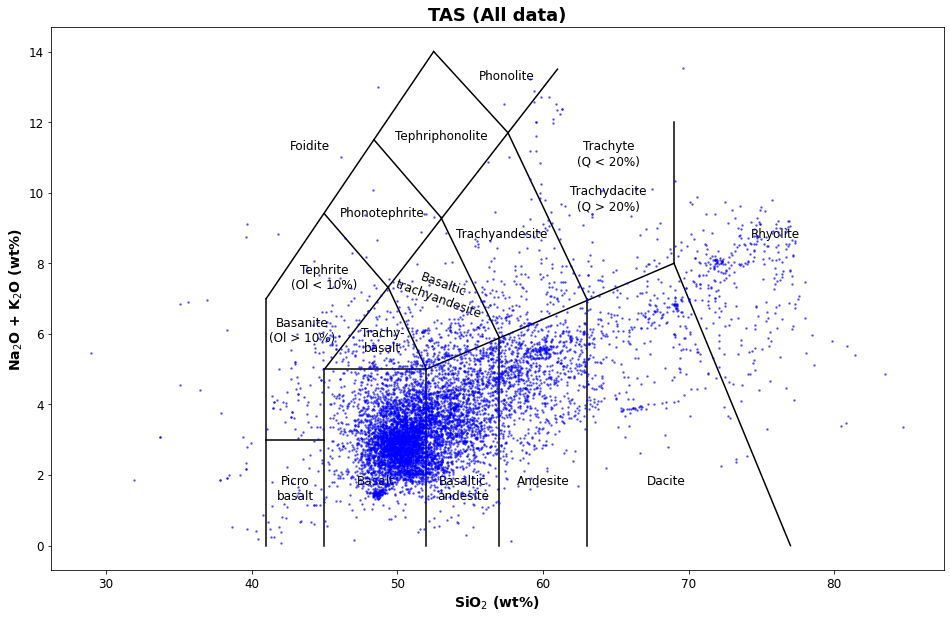

In [ ]:
# Plot TAS diagram
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(111)
tasplot.add_LeMaitre_fields(ax1, color='black', fontsize=12)

x = df_clean['SIO2']
y = df_clean['K2O'] + df_clean['NA2O']
 
ax1.plot(x, y, 'bo', alpha=0.5, markersize=1.5)
 
# Decorate the plot
plt.xlabel(r'SiO$_2$ (wt%)', fontweight='bold', fontsize=14)  # Use LaTeX notation for subscript
plt.ylabel(r'Na$_2$O + K$_2$O (wt%)', fontweight='bold', fontsize=14)
#plt.legend(loc='upper left', numpoints=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('TAS (All data)', fontweight='bold', fontsize=18)

# If you want to save:

#plt.savefig('name.png', dpi=150,
#            bbox_inches='tight')

#### Harker

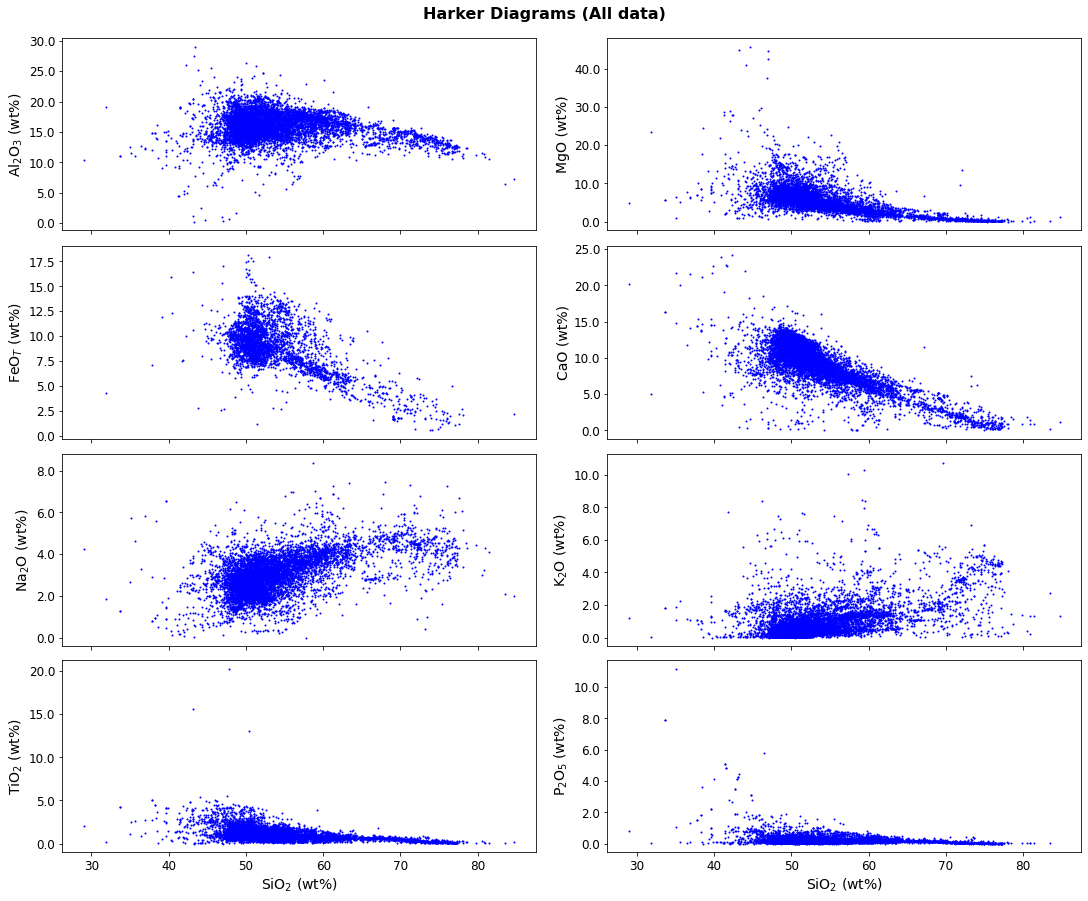

In [ ]:
x = df_clean['SIO2']

fig, axs = plt.subplots(4,2, figsize=(15,12), sharex=True, constrained_layout=True)

# Plotting parameters
yaxis = ['AL2O3', 'MGO', 'FEOT', 'CAO', 'NA2O', 'K2O', 'TIO2', 'P2O5']
ylabels = ['Al$_2$O$_3$ (wt%)', 'MgO (wt%)', 'FeO$_T$ (wt%)', 'CaO (wt%)', 'Na$_2$O (wt%)', 'K$_2$O (wt%)', 'TiO$_2$ (wt%)', 'P$_2$O$_5$ (wt%)']

for i, ax in enumerate(axs.ravel()): #axs is a numpy array, .ravel() returns an one-dimensional array which is a view and works in objects other than numpy arrays
  ax.plot(x, df_clean[yaxis[i]], 'bo', markersize=1)

# Decorators
for i, ax in enumerate(axs.flat): #axs is a numpy array, .flat makes it one-dimensional for looping (flat is a copy)
  ax.set_ylabel(ylabels[i], fontsize=14)
  ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
  ax.yaxis.set_tick_params(labelsize=12)
  if i > 5:
    ax.set_xlabel('SiO$_2$ (wt%)', fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12)

plt.suptitle('Harker Diagrams (All data)', y=1.03, fontsize=16, fontweight='bold')

plt.show()

#### Peccerillo and Taylor

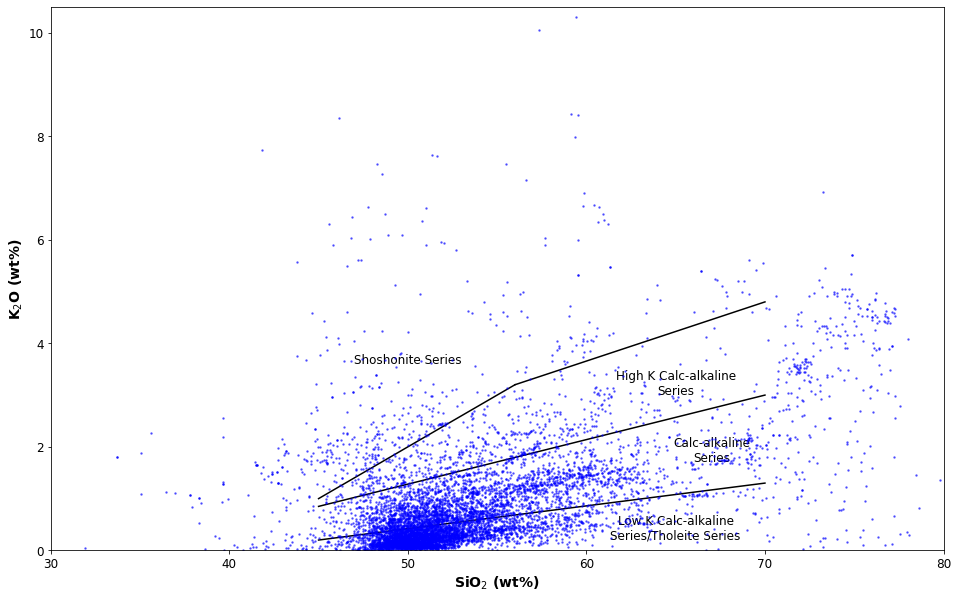

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(16,10))

# Draws the limits of Peccerillo and Taylor diagram
geoplots.add_Peccerillo_fields(ax1, color='black', fontsize=12)

ax1.plot(df_clean['SIO2'], df_clean['K2O'], 'bo', alpha=0.5, markersize=1.5)
 
# Decorate the plot
plt.xlabel(r'SiO$_2$ (wt%)', fontweight='bold', fontsize=14) 
plt.ylabel(r'K$_2$O (wt%)', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(30,80)
plt.ylim(0,10.5)

plt.show()

###Separate adakites and shoshonites

Defant & Drummond (1990) and Thorkelson & Breitsprecher (2005) summarized adakites as high-silica (SiO2 >56%), high-alumina (Al2O3 > 15%), plagioclase and amphibole-bearing lavas with Na2O > 3.5%, high Sr (>400 ppm), low Y (<18 ppm), high Sr/Y (>40), low Yb (<1.9) and high La/Yb (>20).

In [ ]:
mask1 = df_clean['SIO2'] >= 56 
mask2 = df_clean['AL2O3'] >= 15
mask3 = df_clean['NA2O'] >= 3.5
mask4 = df_clean['SR'] > 400
mask5 = df_clean['Y'] < 18
mask6 = df_clean['SR']/df_clean['Y'] > 40
mask7 = df_clean['YB'] < 1.9
mask8 = df_clean['LA']/df_clean['YB'] > 20

In [ ]:
df_adak = df_clean[mask1 & mask2 & mask3 & mask4 & mask5 & mask6 & mask7 & mask8]

The strategy to separate shoshonitic rocks here is to evaluate if the points are above the shoshonitic line of Peccerillo and Taylor (1976).

In [ ]:
# Masks 10 to 13 evaluate the segments of the shoshonitic line of Peccerillo and Taylor (1976)
mask10 = df_clean['SIO2'] >= 45 
mask11 = df_clean['SIO2'] <= 56
mask12 = df_clean['SIO2'] > 56 
mask13 = df_clean['SIO2'] <= 70

# Masks 14 and 15 evaluate the cross-product vectors to know if the points are above or bellow the lines
mask14 = (11*(3.2 - df_clean['K2O']) - 2.2*(56 - df_clean['SIO2'])) < 0
mask15 = (14*(4.8 - df_clean['K2O']) - 1.6*(70 - df_clean['SIO2'])) < 0

In [ ]:
df_45_56 = df_clean[mask10 & mask11]

df_56_70 = df_clean[mask12 & mask13]

In [ ]:
df_shosh = pd.concat([df_45_56[mask14], df_56_70[mask15]])

###Plot adakites and shoshonites individually

####Adakites

Text(0.5, 1.0, 'TAS (Adakites)')

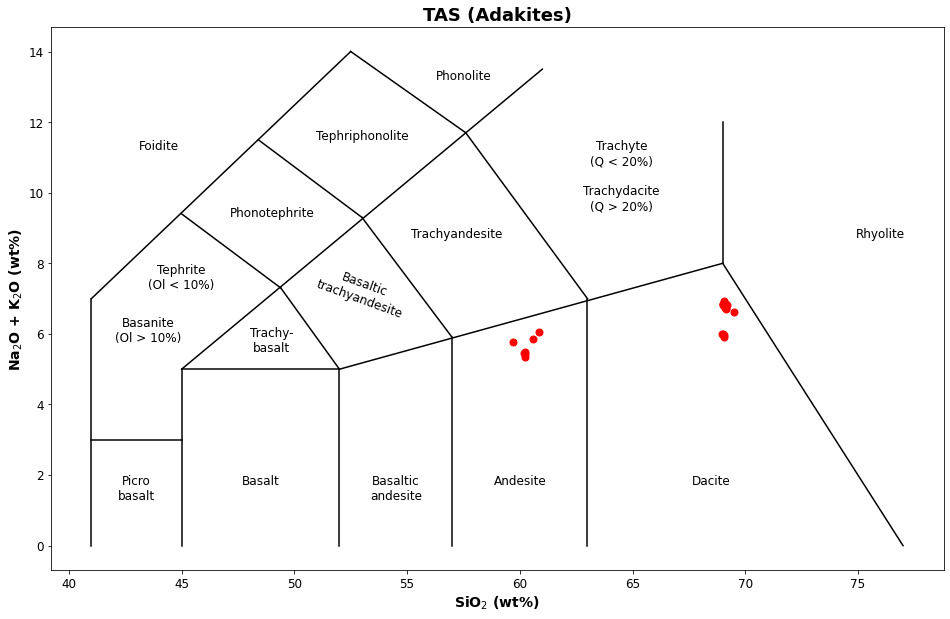

In [ ]:
# Plot TAS diagram
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(111)
tasplot.add_LeMaitre_fields(ax1, color='black', fontsize=12)

x = df_adak['SIO2']
y = df_adak['K2O'] + df_adak['NA2O']
 
ax1.plot(x, y, 'ro', markersize=7)
 
plt.xlabel(r'SiO$_2$ (wt%)', fontweight='bold', fontsize=14)  # Use LaTeX notation for subscript
plt.ylabel(r'Na$_2$O + K$_2$O (wt%)', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('TAS (Adakites)', fontweight='bold', fontsize=18)

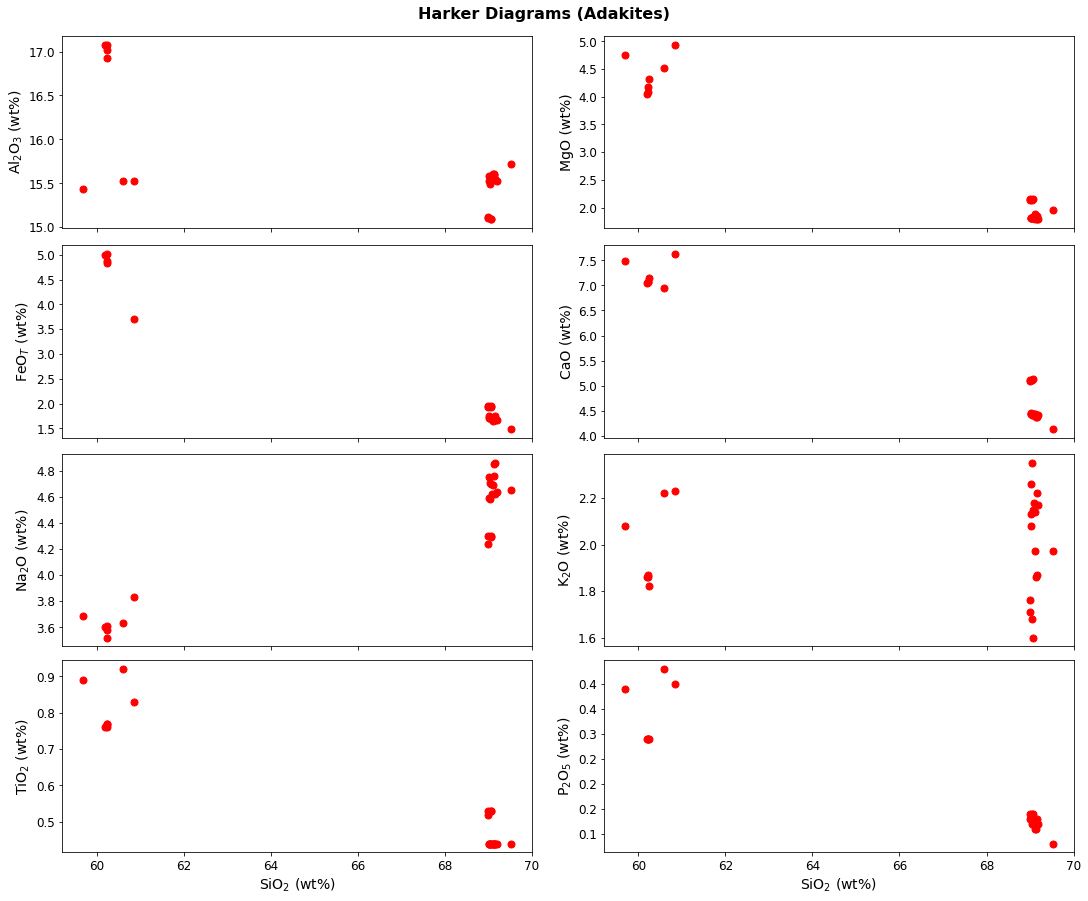

In [ ]:
x = df_adak['SIO2']

fig, axs = plt.subplots(4,2, figsize=(15,12), sharex=True, constrained_layout=True)

# Plotting parameters
yaxis = ['AL2O3', 'MGO', 'FEOT', 'CAO', 'NA2O', 'K2O', 'TIO2', 'P2O5']
ylabels = ['Al$_2$O$_3$ (wt%)', 'MgO (wt%)', 'FeO$_T$ (wt%)', 'CaO (wt%)', 'Na$_2$O (wt%)', 'K$_2$O (wt%)', 'TiO$_2$ (wt%)', 'P$_2$O$_5$ (wt%)']

for i, ax in enumerate(axs.ravel()): #axs is a numpy array, .ravel() returns an one-dimensional array which is a view and works in objects other than numpy arrays
  ax.plot(x, df_adak[yaxis[i]], 'ro', markersize=7)

# Decorators
for i, ax in enumerate(axs.flat): #axs is a numpy array, .flat makes it one-dimensional for looping (flat is a copy)
  ax.set_ylabel(ylabels[i], fontsize=14)
  ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
  ax.yaxis.set_tick_params(labelsize=12)
  if i > 5:
    ax.set_xlabel('SiO$_2$ (wt%)', fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12)

plt.suptitle('Harker Diagrams (Adakites)', y=1.03, fontsize=16, fontweight='bold')

plt.show()

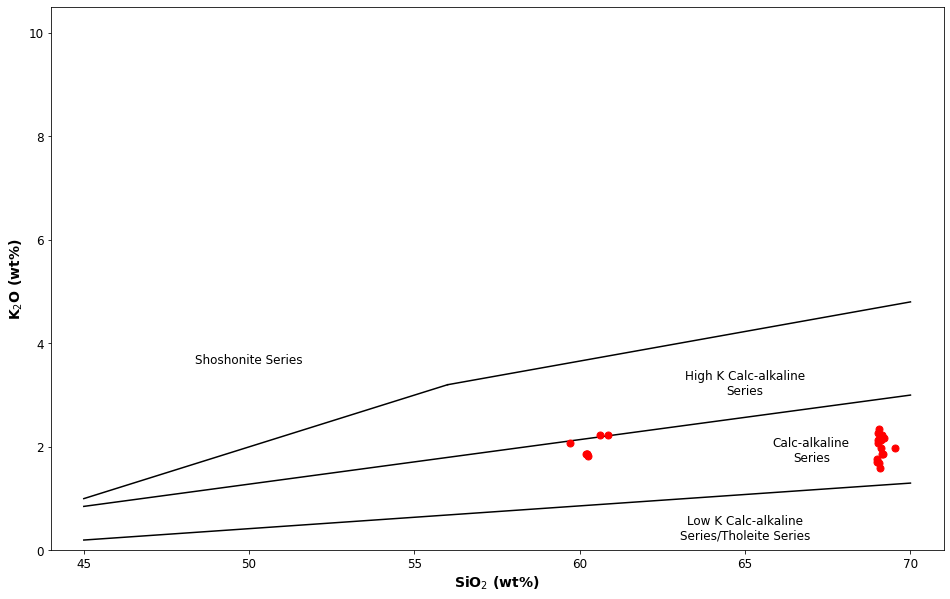

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(16,10))

# Draws the limits of Peccerillo and Taylor diagram
geoplots.add_Peccerillo_fields(ax1, color='black', fontsize=12)

ax1.plot(df_adak['SIO2'], df_adak['K2O'], 'ro', markersize=7)
 
# Decorate the plot
plt.xlabel(r'SiO$_2$ (wt%)', fontweight='bold', fontsize=14) 
plt.ylabel(r'K$_2$O (wt%)', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(44,71)
plt.ylim(0,10.5)

plt.show()

####Shoshonites

Text(0.5, 1.0, 'TAS (Shoshonites)')

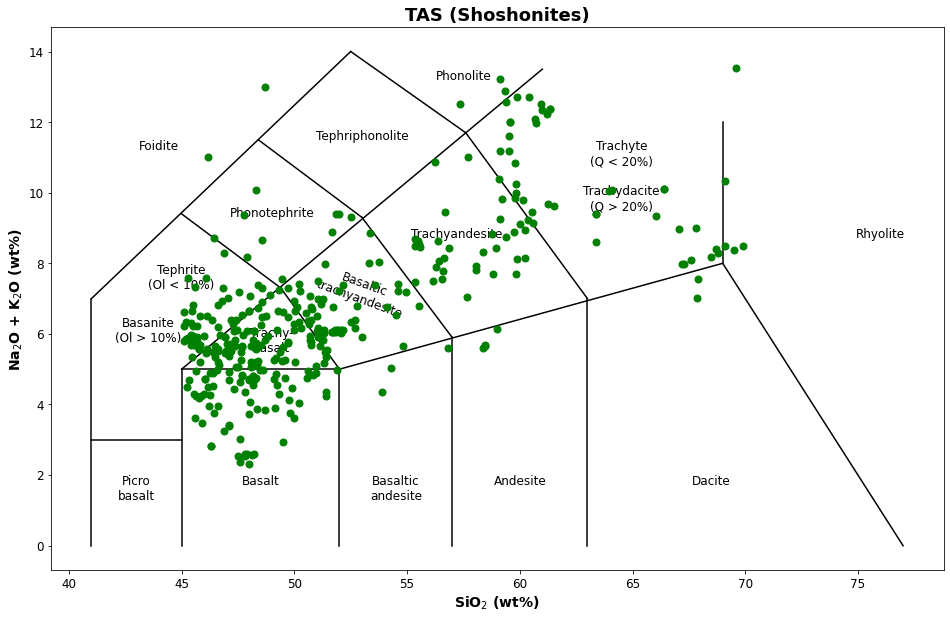

In [ ]:
# Plot TAS diagram
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(111)
tasplot.add_LeMaitre_fields(ax1, color='black', fontsize=12)

x = df_shosh['SIO2']
y = df_shosh['K2O'] + df_shosh['NA2O']
 
ax1.plot(x, y, 'go', markersize=7)
 
plt.xlabel(r'SiO$_2$ (wt%)', fontweight='bold', fontsize=14)  # Use LaTeX notation for subscript
plt.ylabel(r'Na$_2$O + K$_2$O (wt%)', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('TAS (Shoshonites)', fontweight='bold', fontsize=18)

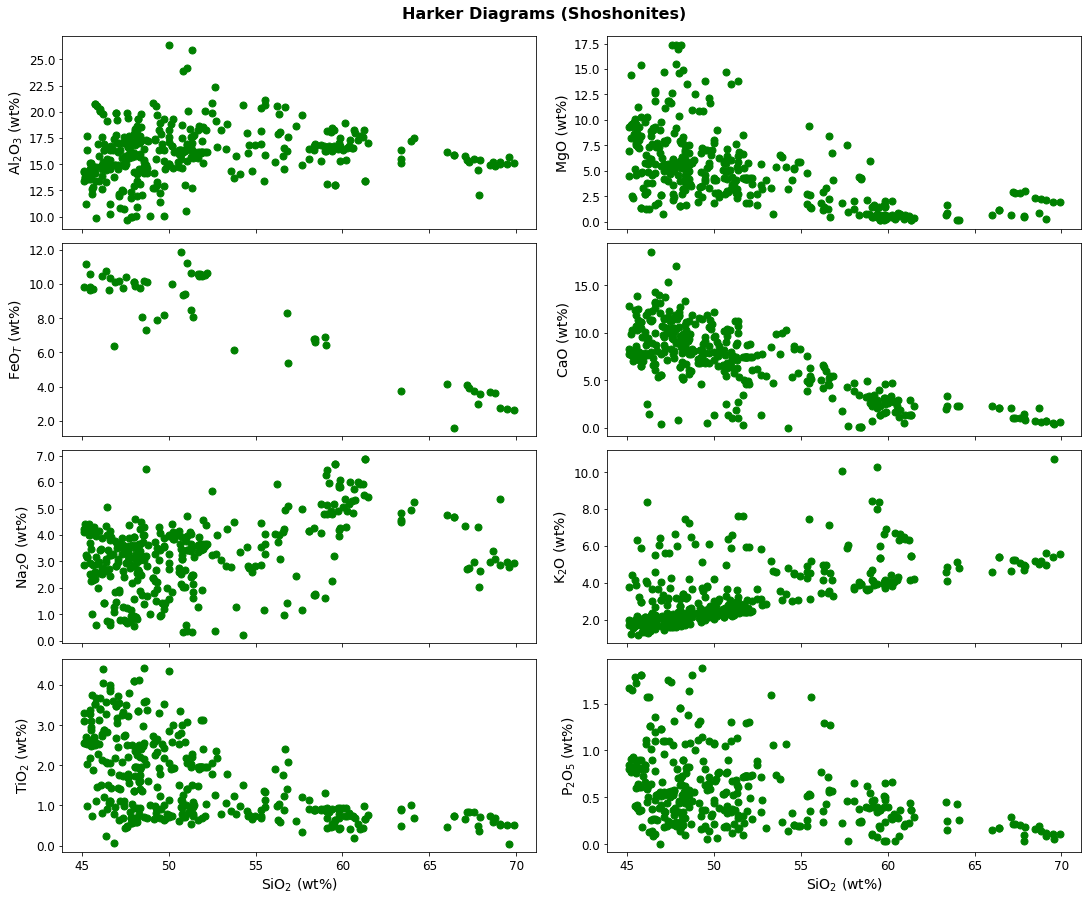

In [ ]:
x = df_shosh['SIO2']

fig, axs = plt.subplots(4,2, figsize=(15,12), sharex=True, constrained_layout=True)

# Plotting parameters
yaxis = ['AL2O3', 'MGO', 'FEOT', 'CAO', 'NA2O', 'K2O', 'TIO2', 'P2O5']
ylabels = ['Al$_2$O$_3$ (wt%)', 'MgO (wt%)', 'FeO$_T$ (wt%)', 'CaO (wt%)', 'Na$_2$O (wt%)', 'K$_2$O (wt%)', 'TiO$_2$ (wt%)', 'P$_2$O$_5$ (wt%)']

for i, ax in enumerate(axs.ravel()): #axs is a numpy array, .ravel() returns an one-dimensional array which is a view and works in objects other than numpy arrays
  ax.plot(x, df_shosh[yaxis[i]], 'go', markersize=7)

# Decorators
for i, ax in enumerate(axs.flat): #axs is a numpy array, .flat makes it one-dimensional for looping (flat is a copy)
  ax.set_ylabel(ylabels[i], fontsize=14)
  ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
  ax.yaxis.set_tick_params(labelsize=12)
  if i > 5:
    ax.set_xlabel('SiO$_2$ (wt%)', fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12)

plt.suptitle('Harker Diagrams (Shoshonites)', y=1.03, fontsize=16, fontweight='bold')

plt.show()

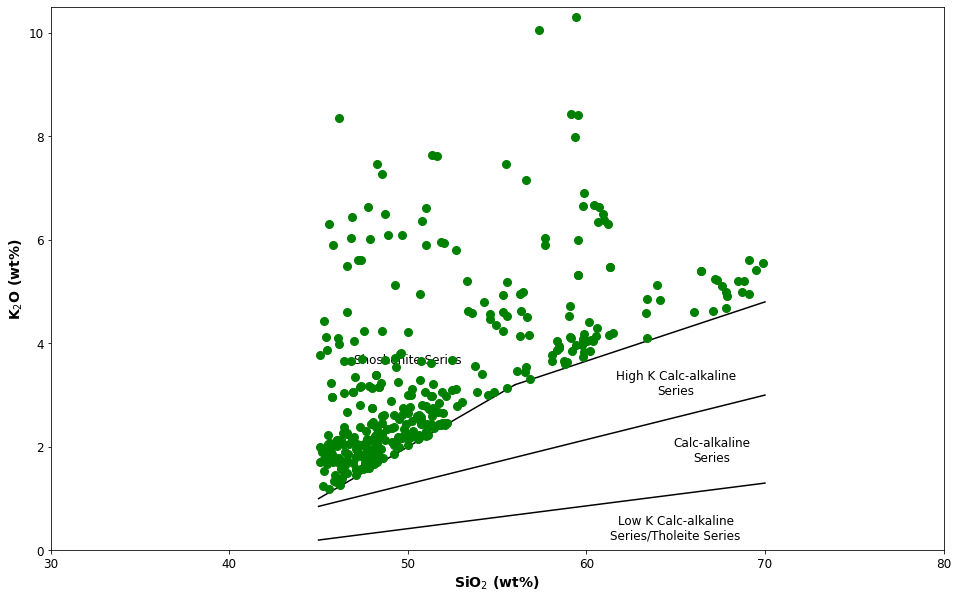

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(16,10))

# Draws the limits of Peccerillo and Taylor diagram
geoplots.add_Peccerillo_fields(ax1, color='black', fontsize=12)

ax1.plot(df_shosh['SIO2'], df_shosh['K2O'], 'go', markersize=7)
 
# Decorate the plot
plt.xlabel(r'SiO$_2$ (wt%)', fontweight='bold', fontsize=14) 
plt.ylabel(r'K$_2$O (wt%)', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(30,80)
plt.ylim(0,10.5)

plt.show()

### To do



*   Review the criteria for separation of adakites or manually gather a database.
*   Plot other diagrams, using a larger variation of elements.
*   See if the selected rocks have age and isotopic information.
